# Emotion and identity detection from face images



## load dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train = pd.read_csv("./data/train.csv");
test = pd.read_csv("./data/test.csv");
train_identity = pd.read_csv("./data/train_identity.csv");

train.columns 

Index(['Emotion', 'Pixels'], dtype='object')

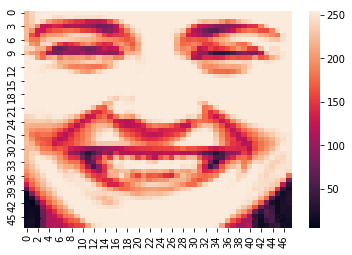

In [12]:
import seaborn as sns;
trainNP = np.array(train["Pixels"][0].split(' '), int).reshape((48,48))
sns.heatmap(trainNP)

In [3]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
X = [];
for frame in train["Pixels"]:
    X.append(np.array( [float(n)/255  for n in frame.split(' ')], float))
    print
X = np.array(X)

In [22]:
Y = train["Emotion"].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

(2924, 2304)
(1254, 2304)
(2924,)
(1254,)


In [24]:
# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [25]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

7


In [49]:
model = Sequential()
model.add(Dense(700, activation='relu', input_dim=48*48))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [53]:
# build the model
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
2924/2924 [==============================] - 1s 370us/step - loss: 0.6762 - acc: 0.7517
Epoch 2/40
2924/2924 [==============================] - 1s 222us/step - loss: 0.7109 - acc: 0.7459
Epoch 3/40
2924/2924 [==============================] - 1s 223us/step - loss: 0.6681 - acc: 0.7579
Epoch 4/40
2924/2924 [==============================] - 1s 224us/step - loss: 0.6744 - acc: 0.7558
Epoch 5/40
2924/2924 [==============================] - 1s 222us/step - loss: 0.7060 - acc: 0.7442
Epoch 6/40
2924/2924 [==============================] - 1s 225us/step - loss: 0.6186 - acc: 0.7681
Epoch 7/40
2924/2924 [==============================] - 1s 224us/step - loss: 0.5974 - acc: 0.7815
Epoch 8/40
2924/2924 [==============================] - 1s 224us/step - loss: 0.6167 - acc: 0.7743
Epoch 9/40
2924/2924 [==============================] - 1s 229us/step - loss: 0.6549 - acc: 0.7616
Epoch 10/40
2924/2924 [==============================] - 1s 220us/step - loss: 0.6083 - acc: 0.7801
Epoch 11/

In [54]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.8885088920104031% 
 Error on training data: 0.11149110798959694
Accuracy on test data: 0.6985645932063722% 
 Error on test data: 0.3014354067936278


In [65]:
X_train

array([[0.37647059, 0.37254902, 0.39215686, ..., 0.28627451, 0.04705882,
        0.01176471],
       [0.4       , 0.42745098, 0.41568627, ..., 0.36078431, 0.32941176,
        0.30588235],
       [0.44313725, 0.45882353, 0.38431373, ..., 0.30980392, 0.56470588,
        0.75686275],
       ...,
       [0.31372549, 0.38039216, 0.29019608, ..., 0.49803922, 0.50980392,
        0.50588235],
       [0.75294118, 0.74509804, 0.78431373, ..., 0.3372549 , 0.28627451,
        0.28627451],
       [0.55294118, 0.58431373, 0.60784314, ..., 0.0627451 , 0.02352941,
        0.06666667]])

In [66]:
x = np.array(np.array([float(n)/255  for n in frame.split(' ')], float))
x.size

2304

In [67]:
x

array([0.59215686, 0.54117647, 0.50588235, ..., 0.51372549, 0.4627451 ,
       0.5254902 ])

In [74]:
import json

json_string = model.to_json()
with open('sw_templates.json', 'w') as f:
    f.write(json.dumps(json_string))

In [75]:
model.save_weights('my_model_weights.h5')

In [76]:
 model.predict(np.array([float(n)/255  for n in  train["Pixels"][0].split(' ')], float))

ValueError: Error when checking input: expected dense_33_input to have shape (2304,) but got array with shape (1,)

[0.00361931 0.16508725 0.575519   0.00970837 0.19528826 0.03833438
 0.01244333]
2


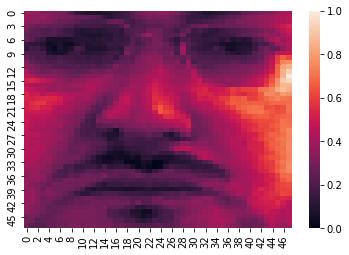

In [120]:
n=999
s = np.array([[float(n)/255 for n in  test["Pixels"][n].split(' ')]])
pred =model.predict(s)
print(pred[0])
print( np.argmax(pred[0]))
sns.heatmap(np.array([float(n)/255 for n in  test["Pixels"][n].split(' ')]).reshape((48,48)))
#beween 0 and 6: anger=0, disgust=1, fear=2, happy=3, sad=4, surprise=5, neutral=6